In [29]:
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

Pandas akan digunakan untuk membaca dan memanipulasi dataset (misalnya, membaca file CSV).

Google Colab files untuk meng-upload file ke dalam notebook untuk analisis.

NumPy akan digunakan untuk operasi numerik atau manipulasi array.

Matplotlib akan digunakan untuk membuat visualisasi data atau grafik.

Scikit-learn metrics akan digunakan untuk mengevaluasi model machine learning, seperti menghitung akurasi, confusion matrix, dan metrik lainnya.

In [30]:
# Upload file dari komputer
uploaded = files.upload()

# Ambil nama file (otomatis dari file yang di-upload)
file_name = list(uploaded.keys())[0]

# Baca file
row_data = pd.read_csv(file_name)

# Tampilkan 5 baris pertama
print(row_data.head())

# Tampilkan ukuran data
print("Ukuran data:", row_data.shape)

Saving bmw.csv to bmw (1).csv
       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  
Ukuran data: (10781, 9)


In [31]:
# Melihat statistik deskriptif dari dataset (tanpa tanda kurung berarti tidak akan dieksekusi, hanya menunjukkan properti)
row_data.describe

# Menghapus baris yang memiliki nilai kosong (NaN)
data = row_data.dropna(axis=0) # axis=0 berarti hapus baris (bukan kolom)

# Menampilkan statistik deskriptif dari data yang sudah bersih (tanpa NaN)
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


*   Count: jumlah baris data yang valid (tidak kosong) untuk tiap kolom numerik
*   Mean: rata-rata nilai.
*   Std: standar deviasi (penyebaran data).
*   Min, 25%, 50%, 75%, max: nilai minimum, kuartil 1, median, kuartil 3, dan maksimum dari tiap kolom.
*   Pada kode "data = row_data.dropna(axis=0)", yaitu misalnya, jika 2 baris punya nilai kosong pada kolom Price, maka data akan memiliki lebih sedikit baris dibanding row_data
*   Pada kode "data.describe()", yaitu menghitung statistik setelah data dibersihkan dari nilai kosong → hasil lebih valid.


In [32]:
# Menampilkan tipe data dari setiap kolom dalam DataFrame
print (row_data.dtypes)

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


Output ini menunjukkan tipe data yang digunakan oleh masing-masing kolom, seperti int64 untuk bilangan bulat, float64 untuk bilangan desimal, dan object untuk tipe data non-numerik, biasanya berupa string atau kategori. Misalnya, kolom Model, FuelType, dan Transmission biasanya bertipe object karena berisi data berupa teks, sementara kolom seperti Year, Mileage, dan Tax bertipe int64 karena berisi angka bulat. Kolom seperti Price, MPG, dan EngineSize bisa bertipe float64 karena berisi angka dengan desimal.

In [33]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = data[features]
y = data['price']
x.shape, y.shape

((10781, 5), (10781,))

Kode ini memisahkan data menjadi fitur (`x`) dan target (`y`). Kolom-kolom seperti `year`, `mileage`, `tax`, `mpg`, dan `engineSize` digunakan sebagai fitur (`x`), sementara kolom `price` digunakan sebagai target (`y`). Perintah `x.shape, y.shape` akan menampilkan dimensi dari masing-masing variabel. Misalnya, hasil `(10000, 5), (10000,)` menunjukkan bahwa ada 10.000 data, dengan 5 fitur pada `x`, dan 1 nilai target pada `y` untuk tiap baris. Ini memastikan bahwa setiap data input memiliki pasangan nilai harga yang sesuai.

In [34]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 70)

Kode ini digunakan untuk membagi data menjadi dua bagian: data latih (training) dan data uji (testing). Variabel `x` (fitur) dan `y` (target) dibagi secara acak menjadi `train_x` dan `train_y` untuk melatih model, serta `test_x` dan `test_y` untuk menguji performa model. Parameter `random_state = 70` digunakan agar pembagian data selalu konsisten setiap kali kode dijalankan (hasilnya tidak berubah). Secara default, pembagian ini akan menggunakan 75% data untuk pelatihan dan 25% untuk pengujian. Pembagian ini penting agar model bisa belajar dari sebagian data dan diuji pada data yang belum pernah dilihat sebelumnya.

In [35]:
train_y.shape

(8085,)

Digunakan untuk melihat dimensi atau ukuran dari data train_y, yaitu target (label) yang digunakan untuk melatih model.

In [36]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg
from sklearn.metrics import mean_squared_error as mse

model = KNN_Reg(n_neighbors = 80)

# mentraining model
model.fit(train_x, train_y)
acc1 = model.score(test_x, test_y)

# tes untuk memprediksi
test_predict = model.predict(test_x)
score = mse(test_predict, test_y)
print(' MSE: ', score, '\n', 'Accuracy: ', acc1)

 MSE:  69966561.79717006 
 Accuracy:  0.4782594640746688


*   MSE menunjukkan seberapa besar kesalahan rata-rata prediksi (semakin kecil, semakin baik).
*   Accuracy (R² score) menunjukkan seberapa baik model menjelaskan data (semakin mendekati 1, semakin bagus). Nilai 0.47 artinya model menjelaskan 47% variasi dalam data target.

In [37]:
def Elbow(K):
  #inisiasi list yang kosong
  test_mse =[]

  #training model untuk setiap K value
  for i in K:
    model = KNN_Reg(n_neighbors=i)
    model.fit(train_x, train_y)
    tmp = model.predict(test_x)
    tmp = mse(tmp, test_y)
    test_mse.append(tmp)

  return test_mse

Fungsi `Elbow(K)` digunakan untuk membantu menentukan nilai `k` (jumlah tetangga) yang optimal dalam algoritma K-Nearest Neighbors Regressor. Fungsi ini menerima daftar nilai `K` sebagai input, lalu melatih model KNN untuk setiap nilai `k` yang diberikan. Untuk setiap model, fungsi menghitung Mean Squared Error (MSE) pada data uji (`test_x`, `test_y`) dan menyimpannya dalam list `test_mse`. Hasil akhirnya adalah list berisi nilai MSE untuk setiap `k`, yang nantinya bisa digunakan untuk membuat grafik "elbow" agar kita bisa melihat di mana nilai `k` mulai menghasilkan MSE yang stabil, sebagai indikasi nilai `k` terbaik.

Text(0.5, 1.0, 'Elbow Curve for Test')

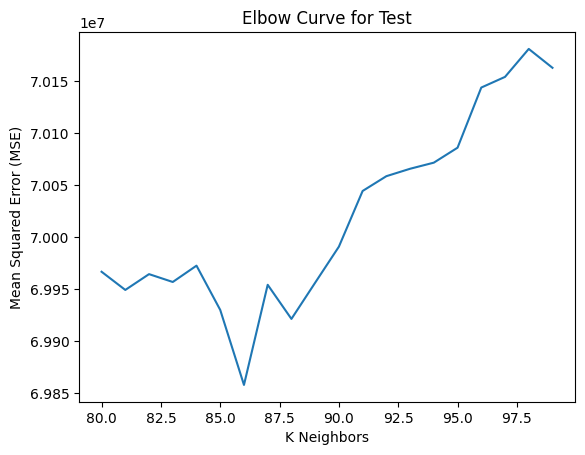

In [38]:
K = range(80, 100)
test = Elbow(K)

#plotting
plt.plot(K,test)
plt.xlabel('K Neighbors')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Curve for Test')

Rentang nilai k yang diuji adalah antara 80 hingga 99, dan setiap nilai k dihitung berdasarkan Mean Squared Error (MSE) untuk mengukur kualitas prediksi model. Fungsi Elbow(K) digunakan untuk mendapatkan MSE pada setiap nilai k. Hasilnya kemudian dipetakan ke dalam sebuah grafik, di mana sumbu X mewakili jumlah tetangga terdekat (k) dan sumbu Y mewakili nilai MSE. Grafik ini digunakan untuk mengidentifikasi titik "tekukan" atau elbow pada kurva, yaitu titik di mana penurunan MSE mulai melambat. Titik ini dianggap sebagai nilai k terbaik karena menunjukkan keseimbangan antara akurasi model dan kompleksitas yang lebih rendah.

In [39]:
new_model = KNN_Reg(n_neighbors=97)

# Train model
new_model.fit(train_x, train_y)
acc2 = new_model.score(test_x, test_y)

# Prediksi test
print(' Akurasi model baru (%):', acc2*100, '\n', 'Akurasi model lama (%):', acc1*100, '\n Peningkatan (%):', (acc2-acc1)*100)

 Akurasi model baru (%): 47.686221283317856 
 Akurasi model lama (%): 47.82594640746688 
 Peningkatan (%): -0.13972512414902605


*   Akurasi model baru: 47.69%

Model baru (dengan k=97) memiliki akurasi sekitar 47.69% saat diuji pada data pengujian. Ini berarti model berhasil memprediksi sekitar 47.69% dari hasil yang benar berdasarkan data uji.
*   Akurasi model lama: 47.83%


Model lama memiliki akurasi 47.83%, yang sedikit lebih tinggi dibandingkan dengan model baru.
*   Peningkatan (%): -0.14%


Peningkatan akurasi dihitung sebagai perbedaan antara akurasi model baru dan model lama, yaitu (acc2 - acc1) * 100. Dalam hal ini, nilai perbedaannya adalah negatif (-0.14%), yang berarti model baru sedikit lebih buruk dibandingkan model lama. Jadi, ada penurunan akurasi sebesar 0.14%.

